In [21]:
import sys
import os as os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from utils import ISTA, IST


In [22]:
def ISTA_runs_with_attacks(runs, n, q, C, tau, lam, x_sparsity, a_sparsity, attack_type, noisy):
    correct_estimations = 0
    num_iterations = []
    estimation_accuracy = []

    for _ in range(20,runs):
        # Generate x_tilda with standard uniform distribution        
        x_tilda = np.random.randn(n)

        # Generate the attack vector a
        a = np.zeros(q)
        attack_indices = np.random.choice(q, a_sparsity, replace=False)
        a[attack_indices] = np.random.choice([-2, -1, 1, 2], a_sparsity)

        if(noisy):
            eta = 10**(-2) * np.random.randn(q)
        else:
            eta = np.zeros(q)

        # Generate the measurements y
        if attack_type == "UNAWARE":
            y = np.dot(C, x_tilda) + eta + a
        elif attack_type == "AWARE":
            y = np.dot(C, x_tilda) + eta
            y[attack_indices] += 0.5 * y[attack_indices]

        # Estimate xe using the weighted ISTA_runs
        lam_weights = np.concatenate((np.zeros(n), np.ones(q)))
        #print("lam :", lam_weights * lam)
        G = np.hstack((C, np.eye(q)))
        w = np.zeros(n+q)
        w_estimated, w_estimated_supp, iterations = ISTA(w, G, tau, lam * lam_weights, y)

        # Extract the estimated x
        x_estimated = w_estimated[:n]

        # Retrieve the estimated attack vector
        a_estimated = w_estimated[n:]

        # Calculate the estimation accuracy
        estimation_accuracy.append(np.linalg.norm(x_tilda - x_estimated)**2)

        # Check if the attack was correctly detected
        if np.array_equal(np.where(a != 0)[0], np.where(a_estimated != 0)[0]):
            correct_estimations += 1

        num_iterations.append(iterations)

    attack_detection_rate = correct_estimations / (runs-20)

    return attack_detection_rate, num_iterations, estimation_accuracy

Notation:
1. Attack detection rate = number of times that the support of a is correctly estimated over the number of runs
2. Estimation accuracy = $$\|\tilde{x}^2 - \hat{x}^2\|$$

In [23]:
runs=1000
q=20
p=10
x_sparsity = p
a_sparsity = 2
C = np.random.randn(q, p)
#calculate tau as a vector with q zeroes and p ones
C_l_2_norm = np.linalg.norm(C, ord=2)
tau = 1 / (C_l_2_norm**2) - 10**(-8)
lam = 2 * 10**(-3) / tau

In [24]:
attack_detection_rate, num_iterations, estimation_accuracy  = ISTA_runs_with_attacks(runs, p, q, C, tau, lam,x_sparsity,a_sparsity, "UNAWARE", noisy=False)

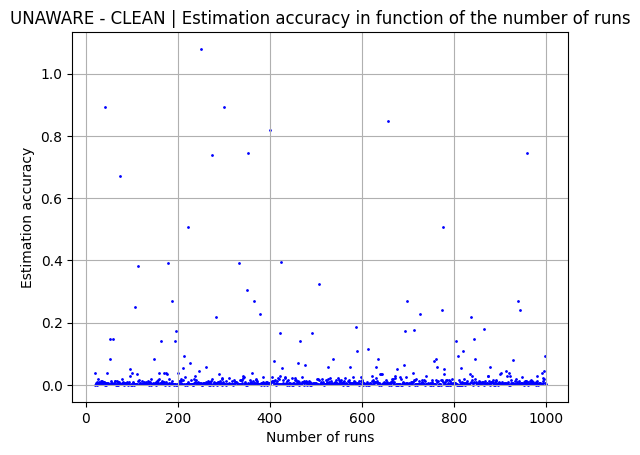

In [25]:
plt.scatter(range(20,runs), estimation_accuracy, s=1, c='blue', marker='o')
plt.xlabel("Number of runs")
plt.ylabel("Estimation accuracy")
plt.title("UNAWARE - CLEAN | Estimation accuracy in function of the number of runs")
plt.grid()
plt.show()

In [26]:
print("Attack detection rate: ", attack_detection_rate)

Attack detection rate:  0.786734693877551


In [27]:
attack_detection_rate, num_iterations, estimation_accuracy  = ISTA_runs_with_attacks(runs, p, q, C, tau, lam,x_sparsity,a_sparsity, "UNAWARE", noisy=True)

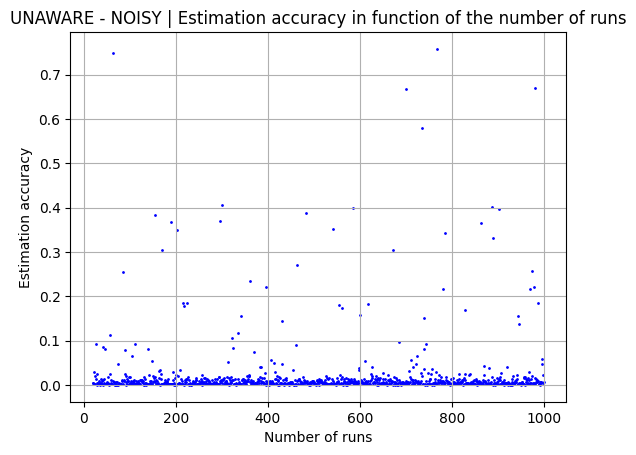

In [28]:
#plot the estimation accuracy in function of the number of runs
plt.scatter(range(20,runs), estimation_accuracy, s=1, c='blue', marker='o')
plt.xlabel("Number of runs")
plt.ylabel("Estimation accuracy")
plt.title("UNAWARE - NOISY | Estimation accuracy in function of the number of runs")
plt.grid()
plt.show()

In [29]:
print("Attack detection rate: ", attack_detection_rate)

Attack detection rate:  0.789795918367347


In [30]:
attack_detection_rate, num_iterations, estimation_accuracy  = ISTA_runs_with_attacks(runs, p, q, C, tau, lam,x_sparsity,a_sparsity, "AWARE", noisy=False)

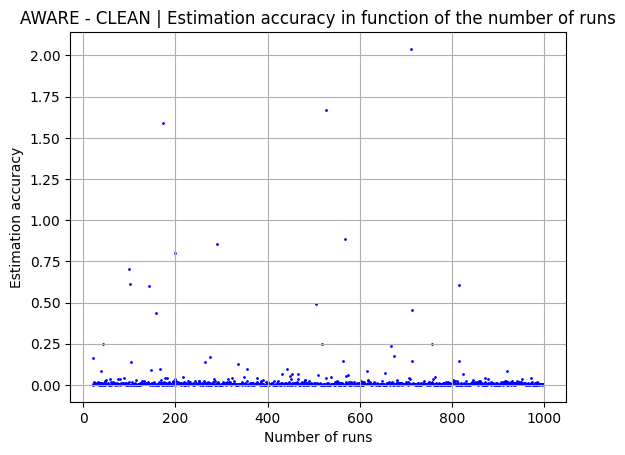

In [31]:
#plot the estimation accuracy in function of the number of runs
plt.scatter(range(20,runs), estimation_accuracy, s=1, c='blue', marker='o')
plt.xlabel("Number of runs")
plt.ylabel("Estimation accuracy")
plt.title("AWARE - CLEAN | Estimation accuracy in function of the number of runs")
plt.grid()
plt.show()

In [32]:
print("Attack detection rate: ", attack_detection_rate)

Attack detection rate:  0.6285714285714286


In [33]:
attack_detection_rate, num_iterations, estimation_accuracy  = ISTA_runs_with_attacks(runs, p, q, C, tau, lam,x_sparsity,a_sparsity, "AWARE", noisy=True)

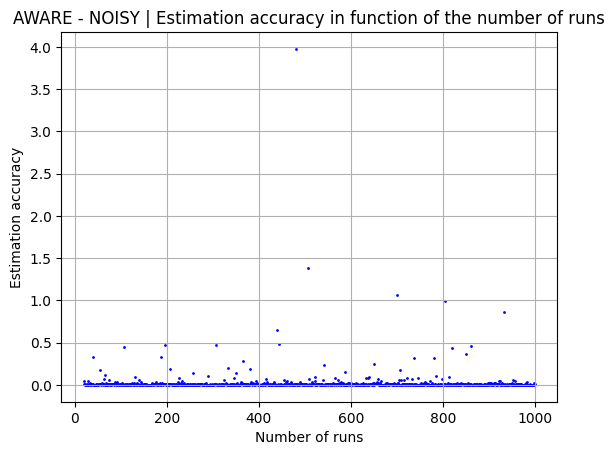

In [34]:
#plot the estimation accuracy in function of the number of runs
plt.scatter(range(20,runs), estimation_accuracy, s=1, c='blue', marker='o')
plt.xlabel("Number of runs")
plt.ylabel("Estimation accuracy")
plt.title("AWARE - NOISY | Estimation accuracy in function of the number of runs")
plt.grid()
plt.show()

In [35]:
print("Attack detection rate: ", attack_detection_rate)

Attack detection rate:  0.5989795918367347
